In [46]:
import pandas as pd
import numpy as np
import tweepy as tw
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import matplotlib
import matplotlib.pyplot as plt
import re

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ecy14\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [47]:
def getClient():
    client = tw.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAJgTZwEAAAAAFVLr%2F%2FClRF6djF%2Ft7s5yswscGN8%3DDRcPCVEXPcYx6zmrNscHjB1uEwOYdN9dwcZc00aZbh8D3TNPL0', 
                       consumer_key='697t3SlCIA8EQqhuUXt6hvdR2', 
                       consumer_secret='vvx7jQTsQx0DsdqywLCbNXy7fVGfZ0pHIsHV7ABAn9B38GYeWA', 
                       access_token='4552843577-Fz1dti9bkAEtMUnKJN8uq9rs9DC22L8J0k3eA2M', 
                       access_token_secret='UhoqlCSKwv269iEX3IhjsxUE4huNaTKMWSniIUwEWYd8l')
    return client
    

In [48]:
def getUserID(user):
    client = getClient()
    x = client.get_user(username= user)
    
    return x
#return type dict
#getting user id from the twitter handle


In [49]:
def mentionTweets(userId):
    client = getClient()
    tweetMentions = client.get_users_mentions(id = userId, start_time='2022-02-01T00:00:00.000Z' , end_time='2022-02-07T00:00:00.000Z',max_results = 100,expansions = 'author_id')
    tweetMentionData = tweetMentions.data # raw data
    resultsMentions = []
    if not tweetMentionData is None and len(tweetMentionData) > 0:
        for tweet in tweetMentionData:
            #tweetAID = client.statuses_lookup(id = tweet.id)  trying to find a away to get author id from a mention
            obj = {}
            obj['author id'] = tweet.author_id # issue* : it's printing none, author id is the onw who made the mention
            obj['id'] = tweet.id  # use the tweet id to author id
            obj['text'] = tweet.text  # prints out text
            obj['for'] = userId
            resultsMentions.append(obj)
    else:
        return []
    return resultsMentions
    

In [50]:
def userTweets(userId):
    client = getClient()
    userTweet = client.get_users_tweets(id = userId, start_time='2022-02-01T00:00:00.000Z' , end_time='2022-02-07T00:00:00.000Z',expansions = 'author_id')
    tweetuserData = userTweet.data
    resultsTweets = []
    if not tweetuserData is None and len(tweetuserData) > 0:
        for tweet in tweetuserData:
            obj = {}
            obj['author id'] = userId
            obj['id'] = tweet.id
            obj['text'] = tweet.text
            obj['for'] = tweet.author_id
            resultsTweets.append(obj)
    return resultsTweets
  

In [51]:
z = getUserID('elonmusk')
z

Response(data=<User id=44196397 name=Elon Musk username=elonmusk>, includes={}, errors=[], meta={})

In [52]:
mentionTweets(28886036)


[{'author id': 754720008509403137,
  'id': 1489706377689841671,
  'text': 'Happy #BlackHistoryMonth, Anaheim! Celebrate Black voices this month and beyond by visiting your library to check out the books below and more!\n\n⭐ "Pet" by by @azemezi \n⭐ "Now That I\'ve Found You" by @KristinaForest \n⭐ "Punching the Air" by @ibizoboi &amp; @dr_yusefsalaam https://t.co/SoIZhfXUQD',
  'for': 28886036},
 {'author id': 2518142763,
  'id': 1489631547162611715,
  'text': 'Rewatched both, @13THFilm (for at least the 100th ⏰ and @WhenTheySeeUs Tears always flow, but I always find myself smiling bigger at the end. @dr_yusefsalaam  @koreykingwise @AntronMccray @santanaraymond faces &amp; where they are now makes my ❤️ happy! TY @ava',
  'for': 28886036},
 {'author id': 160625658,
  'id': 1489383593721933824,
  'text': '.@dr_yusefsalaam',
  'for': 28886036},
 {'author id': 1122758179,
  'id': 1489382858158493706,
  'text': 'I asked @dr_yusefsalaam what advice could he give me as a person on the outsid

In [53]:
userTweets(28886036)

[{'author id': 28886036,
  'id': 1488922592035721218,
  'text': '.\n#PowerPost💪🏻💪🏼💪🏽💪🏾💪🏿™️\n\nJoin me in conversation tomorrow at @mbp_msu!!!!! as we talk Slavery to Freedom with @dr.yusefsalaam \n\nFeb 3, 2022 05:00 PM EST\n\nRegister here:\n\nhttps://t.co/gHt2mX5GCy https://t.co/yar1zTHf5i',
  'for': 28886036},
 {'author id': 28886036,
  'id': 1488922082234839051,
  'text': '📷 . #PowerPost💪🏻💪🏼💪🏽💪🏾💪🏿™️ Join me in conversation tomorrow at @mbp_msu!!!!! as we talk Slavery to Freedom with @dr.yusefsalaam Feb 3, 2022 05:00 PM EST Register here: https://t.co/gHt2mX5GCy... https://t.co/jxCstk2oUg',
  'for': 28886036},
 {'author id': 28886036,
  'id': 1488922080510947330,
  'text': 'Just posted a photo https://t.co/Q6vSYbqPUY',
  'for': 28886036}]

In [54]:
gotMentionTweets = mentionTweets(28886036)
tweet_batch_m = pd.DataFrame(gotMentionTweets)
tweet_batch_m

,author id,id,text,for
0,754720008509403137,1489706377689841671,"Happy #BlackHistoryMonth, Anaheim! Celebrate B...",28886036
1,2518142763,1489631547162611715,"Rewatched both, @13THFilm (for at least the 10...",28886036
2,160625658,1489383593721933824,.@dr_yusefsalaam,28886036
3,1122758179,1489382858158493706,I asked @dr_yusefsalaam what advice could he g...,28886036
4,3873228269,1489363690658881549,Impactful 22nd annual Dr. William G. Anderson ...,28886036
5,1122758179,1489359452780257284,Waiting for @dr_yusefsalaam on this webinar! S...,28886036
6,574005482,1489246492988739587,#Day24: a book collaboration by 2 or more auth...,28886036
7,565922680,1489223940790759434,@maikamoulite @acevedowrites @MaritzaMoulite @...,28886036
8,215036904,1489066639375147015,@resses_peace @acevedowrites @MaritzaMoulite @...,28886036
9,565922680,1488951615180660740,@acevedowrites @maikamoulite @MaritzaMoulite @...,28886036


In [55]:
#finding the polarity scores
sent_list_m = []
for i in range(len(tweet_batch_m)):
    sent_value = SentimentIntensityAnalyzer()
    pol_score = sent_value.polarity_scores(tweet_batch_m.loc[i, 'text'])
    sent_list_m.append(pol_score)
    
df_pol_m = pd.DataFrame(sent_list_m)
df_pol_m

,neg,neu,pos,compound
0,0.000,0.830,0.170,0.8395
1,0.029,0.690,0.281,0.9370
2,0.000,1.000,0.000,0.0000
3,0.067,0.780,0.153,0.5805
4,0.096,0.577,0.327,0.8917
5,0.000,0.697,0.303,0.8504
6,0.031,0.673,0.296,0.9428
7,0.000,1.000,0.000,0.0000
8,0.000,1.000,0.000,0.0000
9,0.000,1.000,0.000,0.0000


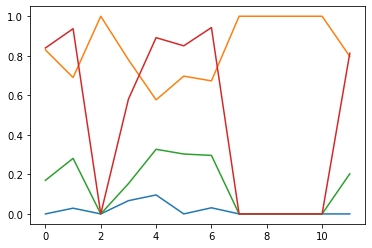

In [56]:
#same thing done for the user tweets
plt.plot(df_pol_m)

In [57]:
tweet_batch_u = pd.DataFrame(gotMentionTweets)
# tweet_batch_u

In [58]:
#finding the polarity scores
sent_list_u = []
for i in range(len(tweet_batch_u)):
    sent_value = SentimentIntensityAnalyzer()
    pol_score = sent_value.polarity_scores(tweet_batch_u.loc[i, 'text'])
    sent_list_u.append(pol_score)
    
df_pol_u = pd.DataFrame(sent_list_u)
df_pol_u

,neg,neu,pos,compound
0,0.000,0.830,0.170,0.8395
1,0.029,0.690,0.281,0.9370
2,0.000,1.000,0.000,0.0000
3,0.067,0.780,0.153,0.5805
4,0.096,0.577,0.327,0.8917
5,0.000,0.697,0.303,0.8504
6,0.031,0.673,0.296,0.9428
7,0.000,1.000,0.000,0.0000
8,0.000,1.000,0.000,0.0000
9,0.000,1.000,0.000,0.0000


In [59]:
# cleans the tweet's text
def cleanTxt(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt) # Removed @mentioned
    txt = re.sub(r'#', '', txt) # remove #
    txt = re.sub(r'RT[\s]+', '', txt) #remove RT
    txt = re.sub(r'http?:\/\/S+', '', txt)
    txt = re.sub(r'\n_', '', txt)
    
    return txt

In [61]:
# applying the cleanTxt function on text
tweet_batch['text'] = tweet_batch['text'].apply(cleanTxt)
# tweet_batch

NameError: name 'tweet_batch' is not defined

In [ ]:
# Get the subjectivity of the text
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


In [ ]:
# Get the polarity of the text
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


In [ ]:
# applying the getSubjectivity and getPolarity functions on text
tweet_batch['Subjectivity'] = tweet_batch['text'].apply(getSubjectivity)
tweet_batch['Polarity'] = tweet_batch['text'].apply(getPolarity)
# tweet_batch


In [ ]:
# define if the tweet is negative/positive/neutral
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    

In [ ]:
tweet_batch['Analysis'] = tweet_batch['Polarity'].apply(getAnalysis)
# tweet_batch

In [ ]:
# plots the sentiment analysis as a scatterplot graph
plt.figure(figsize = (8,6))
for i in range(0, tweet_batch.shape[0]):
    plt.scatter(tweet_batch['Polarity'][i], tweet_batch['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
# detecting if profanity exists in the text
def detectProfanity(txt):
    if __name__ == "__main__":
        dirty_text = txt;
    return bool(profanity.contains_profanity(dirty_text))

In [ ]:

tweet_batch['Profanity'] = tweet_batch['text'].apply(detectProfanity)

In [ ]:
combine = tweet_batch.combine_first(sent_scores) #gets rid of text***
# combine

In [ ]:
combine.mean()
